<strong> <h1> <pre>PR: Assignment #2 Network Anomaly Detection</pre> </h1> </strong>
### Team Memebers:
*   19015267 - Ahmed Ashour El-Sayed Mohammed
*   17012296 - Abdelrahman Adel AbdelFattah
*   19016744 - Mayar Ayman Mahmoud Elkhouly

In [ ]:
# Imports
import csv
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from numpy import array
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pandas.core.dtypes.cast import can_hold_element
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn import metrics
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# function to convert the specific catrgorical columns to numeric values from 0 to n-1
def convertToNumeric(df):
    cat_columns = df.select_dtypes(['object']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

def printWithTitle(title, A, end = "\n\n"):
    print(f'\033[1m{title}:\033[0m'); print(A, end = end)
def printTitle(title, end = '\n'):
    print(f'\033[1m{title}:\033[0m', end = end)
def printDataFrames(train, test, trainName = 'Train', testName = 'Test'):
    printWithTitle(f'{trainName} Data Frame', train)
    printWithTitle(f'{testName} Data Frame', test)

# 1. **Download Datset and Understand the Format**
#####  **"The KDD Cup 1999"** dataset, which is a widely used benchmark dataset for network anomaly detection. This dataset contains network traffic data collected from a simulated environment, including features such as protocol type, service, source and destination IP addresses, source and destination ports, and attack types. The data is available at the following [link](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data) <br> 
&emsp;&emsp;You will use the **kddcup.data.gz** for training and **corrected.gz** for testing. <br>
&emsp;&emsp;Analyze the dataset and preprocess the dataset to be ready for clustering. <br>
**"Change the categorical features to numerical"**


In [ ]:
# Uplaod the zip file, then run this code to unzip it to run remaining cells with no issues
from zipfile import ZipFile
file_name = 'kddcup.data_10_percent.gz.zip'
file3_name = 'kddcup.data.gz.zip'
file2_name = 'corrected.gz.zip'

with ZipFile(file_name, 'r') as zipF:
    zipF.extractall()

with ZipFile(file2_name, 'r') as zipF2:
    zipF2.extractall()

with ZipFile(file3_name, 'r') as zipF2:
    zipF2.extractall()

In [ ]:
# Reading All data "kddcup.data.gz"
###################################

train_data_all = pd.read_csv('kddcup.data.gz', header=None) # load data in dataFrame
convertToNumeric(train_data_all) # Convert all categorical columns to numeric
printWithTitle("train_data" , train_data_all)
printWithTitle("train_data dim" , train_data_all.shape)

train_data:
         0   1   2   3    4      5   6   7   8   9   ...   32   33   34    35  \
0         0   0   0   0  215  45076   0   0   0   0  ...    0  0.0  0.0  0.00   
1         0   0   0   0  162   4528   0   0   0   0  ...    1  1.0  0.0  1.00   
2         0   0   0   0  236   1228   0   0   0   0  ...    2  1.0  0.0  0.50   
3         0   0   0   0  233   2032   0   0   0   0  ...    3  1.0  0.0  0.33   
4         0   0   0   0  239    486   0   0   0   0  ...    4  1.0  0.0  0.25   
...      ..  ..  ..  ..  ...    ...  ..  ..  ..  ..  ...  ...  ...  ...   ...   
4898426   0   0   0   0  212   2288   0   0   0   0  ...  255  1.0  0.0  0.33   
4898427   0   0   0   0  219    236   0   0   0   0  ...  255  1.0  0.0  0.25   
4898428   0   0   0   0  218   3610   0   0   0   0  ...  255  1.0  0.0  0.20   
4898429   0   0   0   0  219   1234   0   0   0   0  ...  255  1.0  0.0  0.17   
4898430   0   0   0   0  219   1098   0   0   0   0  ...  255  1.0  0.0  0.14   

           36  

In [ ]:
# Reading Testing data "corrected.gz"
#####################################

test_data = pd.read_csv('corrected.gz', header=None) # load data in dataFrame
convertToNumeric(test_data) # Convert all categorical columns to numeric
printWithTitle("test_data", test_data)
printWithTitle("test_data dim" , test_data.shape)

test_data:
        0   1   2   3    4    5   6   7   8   9   ...   32   33    34    35  \
0        0   0   0   0  105  146   0   0   0   0  ...  254  1.0  0.01  0.00   
1        0   0   0   0  105  146   0   0   0   0  ...  254  1.0  0.01  0.00   
2        0   0   0   0  105  146   0   0   0   0  ...  254  1.0  0.01  0.00   
3        0   0   0   0  105  146   0   0   0   0  ...  254  1.0  0.01  0.00   
4        0   0   0   0  105  146   0   0   0   0  ...  254  1.0  0.01  0.01   
...     ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ...  ...  ...   ...   ...   
311024   0   0   0   0  105  147   0   0   0   0  ...  255  1.0  0.00  0.01   
311025   0   0   0   0  105  147   0   0   0   0  ...  255  1.0  0.00  0.01   
311026   0   0   0   0  105  147   0   0   0   0  ...  255  1.0  0.00  0.01   
311027   0   0   0   0  105  147   0   0   0   0  ...  255  1.0  0.00  0.01   
311028   0   0   0   0  105  147   0   0   0   0  ...  255  1.0  0.00  0.01   

         36   37   38   39   40  41  
0 

In [ ]:
# Reading 10% of Data "kddcup.data_10_percent.gz"
#################################################

train_data = pd.read_csv('kddcup.data_10_percent.gz', header=None) # load data in dataFrame
convertToNumeric(train_data) # Convert all categorical columns to numeric
printWithTitle("train_data_10%" , train_data)
printWithTitle("train_data_10% dim" , train_data.shape)

train_data_10%:
        0   1   2   3    4     5   6   7   8   9   ...   32   33   34    35  \
0        0   0   0   0  181  5450   0   0   0   0  ...    9  1.0  0.0  0.11   
1        0   0   0   0  239   486   0   0   0   0  ...   19  1.0  0.0  0.05   
2        0   0   0   0  235  1337   0   0   0   0  ...   29  1.0  0.0  0.03   
3        0   0   0   0  219  1337   0   0   0   0  ...   39  1.0  0.0  0.03   
4        0   0   0   0  217  2032   0   0   0   0  ...   49  1.0  0.0  0.02   
...     ..  ..  ..  ..  ...   ...  ..  ..  ..  ..  ...  ...  ...  ...   ...   
494016   0   0   0   0  310  1881   0   0   0   0  ...  255  1.0  0.0  0.01   
494017   0   0   0   0  282  2286   0   0   0   0  ...  255  1.0  0.0  0.17   
494018   0   0   0   0  203  1200   0   0   0   0  ...  255  1.0  0.0  0.06   
494019   0   0   0   0  291  1200   0   0   0   0  ...  255  1.0  0.0  0.04   
494020   0   0   0   0  219  1234   0   0   0   0  ...  255  1.0  0.0  0.17   

          36    37    38   39   40 

# 2. **Clustering Using K-Means and Normalized Cut (Your implementation)**
#####  Use K-Means to cluster the network traffic data and identify anomalies. <br> Every data traffic is a feature vector of 41 dimension.
##### We will use this feature representation to do the clustering.
##### We will change the K of the K-means algorithm between {7, 15, 23, 31, 45} clusters. You will produce different clusters.



In [ ]:
def kmean(train_data, k, random_seed = None):

    # Applying The random seed (if passed)
    if random_seed != None:
        np.random.seed(random_seed)
    
    # Convert the data to a numpy array with 32 bit (64 is defualt)
    data = train_data
    
    max_iterations = 100
    

    #get randomlly k centroids from the data
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]

    
    for i in range(max_iterations):
        # Assign each data point to its closest centroid
        distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Update centroids based on the mean of the assigned data points
        for j in range(k):
            if len(data[clusters == j]) > 0:
                centroids[j] = np.mean(data[clusters == j], axis=0)

    # Assign each data point to its final cluster
    final_clusters = [[] for _ in range(k)]
    y_pred = np.zeros(len(data), dtype=int) # Initialize an array to store predicted labels
    for i, point in enumerate(data):
        dist_to_centroids = np.linalg.norm(point - centroids, axis=1)
        y_pred[i] = np.argmin(dist_to_centroids) # Assign the point to the nearest centroid
        final_clusters[y_pred[i]].append(point)

    return y_pred, final_clusters, centroids


In [ ]:
y,clus , cent= kmean(train_data.to_numpy(dtype=np.float32)[:, :-1] , 7 )

    

#print(f"          *************************** k= {K} ************************** ")
    # Print the final clusters
for i, cluster in enumerate(clus):
    print(f"Cluster {i+1}: {len(cluster)} points")
        #print(f"Centroid: {centroids[i]}")
    print()

print(y)

Cluster 1: 1 points

Cluster 2: 82 points

Cluster 3: 80 points

Cluster 4: 198279 points

Cluster 5: 18 points

Cluster 6: 295539 points

Cluster 7: 22 points

[3 3 3 ... 3 3 3]


In [ ]:
y,clus , cent= kmean(train_data.to_numpy(dtype=np.float32)[:, :-1] , 7 )
for i, cluster in enumerate(clus):
    print(f"Cluster {i}: {len(cluster)} points")
        #print(f"Centroid: {centroids[i]}")
    print()

print(y)

Cluster 0: 198279 points

Cluster 1: 18 points

Cluster 2: 295539 points

Cluster 3: 22 points

Cluster 4: 82 points

Cluster 5: 1 points

Cluster 6: 80 points

[0 0 0 ... 0 0 0]


In [ ]:
y,clus , cent= kmean(train_data.to_numpy(dtype=np.float32)[:, :-1] , 7 , [1,5,2,6,10,9,3])
for i, cluster in enumerate(clus):
    print(f"Cluster {i}: {len(cluster)} points")
        #print(f"Centroid: {centroids[i]}")
    print()

print(y)

Cluster 0: 18 points

Cluster 1: 1 points

Cluster 2: 2341 points

Cluster 3: 82 points

Cluster 4: 491482 points

Cluster 5: 21 points

Cluster 6: 76 points

[4 4 4 ... 4 4 4]


In [ ]:
K_values = [7,15, 23, 31 , 45]
#K_values=[7,15]
for K in K_values:
    y,clus , cent =kmean(train_data.to_numpy(dtype=np.float32)[:, :-1] , K)
    colors = sns.color_palette(n_colors=K)

    print(f"          *************************** k= {K} ************************** ")
    # Print the final clusters
    for i, cluster in enumerate(clus):
        print(f"Cluster {i+1}: {len(cluster)} points")
        #print(f"Centroid: {centroids[i]}")
        print()
    # Convert color palette to list of RGB tuples
    # colors = [tuple(color) for color in colors]
    # for i, cluster in enumerate(clus):
    #     color = colors[i % len(colors)]
    #     #plt.scatter([p[0] for p in cluster], [p[1] for p in cluster], c=color, alpha=0.5)
    #     plt.title(f'K-Means Clustering (K={K})')
    #     #plt.show()
    # plt.show(clus)

          *************************** k= 7 ************************** 
Cluster 1: 18 points

Cluster 2: 22 points

Cluster 3: 1 points

Cluster 4: 82 points

Cluster 5: 80 points

Cluster 6: 295539 points

Cluster 7: 198279 points

          *************************** k= 15 ************************** 
Cluster 1: 1 points

Cluster 2: 1044 points

Cluster 3: 973 points

Cluster 4: 615 points

Cluster 5: 236121 points

Cluster 6: 17 points

Cluster 7: 67 points

Cluster 8: 2304 points

Cluster 9: 53106 points

Cluster 10: 82 points

Cluster 11: 8943 points

Cluster 12: 18 points

Cluster 13: 22 points

Cluster 14: 189691 points

Cluster 15: 1017 points

          *************************** k= 23 ************************** 
Cluster 1: 1 points

Cluster 2: 2272 points

Cluster 3: 169308 points

Cluster 4: 82 points

Cluster 5: 23 points

Cluster 6: 6 points

Cluster 7: 574 points

Cluster 8: 395 points

Cluster 9: 565 points

Cluster 10: 16 points

Cluster 11: 73 points

Cluster 12: 48 po

In [ ]:
def assign_clusters(Test_data , centroids):
    data = Test_data.to_numpy(dtype=np.float32)[:, :-1]
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    final_clusters = [[] for _ in range(len(centroids))]
    for i, point in enumerate(data):
        final_clusters[clusters[i]].append(point)

    for i, cluster in enumerate(final_clusters):
        print(f"Cluster {i}: {np.count_nonzero(clusters == i)} points")
        #print(f"Centroid: {centroids[i]}")
        print()

    return clusters

# 3. **Normalized Cut (Your implementation)**
##### Use Normalized cut algorithm to cluster the network traffic data and identify anomalies. For this experiments we need to decrease the size of the dataset for it to run successfully.
*   Set the random seed across all experiments to 42
*   Split the training dataset used using train test split in sklearn, and take **only <s>0.5%</s> 0.15% of the data in the new training set**. Be sure you set **stratify = True**.
*   Apply Normalized Cut algorithm to the preprocessed data to cluster the data into **<s>23</s> 11 clusters**.
*   Rerun the experiments on K-Means when K=<s>23</s> 11.
*   Compare the results of K-Means and Normalized Cut clustering in terms of the number of detected anomalies and their characteristics.

In [ ]:
# Spectral clustering algorithm
def spectral_clustering(Data, k):
    A = cosine_similarity(Data)
    D = np.diag(np.sum(A, axis=1)) # Degree matrix (D)
    La = np.linalg.inv(D) @ (D - A) # Normalized Laplacian Matrix (La)
    eigval, eigvec = np.linalg.eigh(La) # EigenValues and EigenVectors of La
    idx = np.argsort(eigval) # sorting eigenvalues and eigenvectors
    eigval = eigval[idx]
    eigvec = eigvec[:, idx]
    eigval = eigval[:k] # Selecting eigenvectors corresponding to k smallest eigenvalues
    eigvec = eigvec[:, :k]
    # kmeans = KMeans(n_clusters = k, random_state = 42).fit(eigvec) # k-means clustering
    # return kmeans.labels_
    return kmean(eigvec , k)[0]

# function to normalize the labels after splitting the data
def normalize_labels(y_true):
    y_true_unique = np.unique(y_true)
    for i in range(len(y_true_unique)):
        y_true[y_true == y_true_unique[i]] = i
        # idx = np.where(y_true == y_true_unique[i])
        # y_true[idx] = i

In [ ]:
# Splitting the data into train and test
X_train, X_test = train_test_split(train_data_all, train_size = 0.0015, random_state = 42, stratify = train_data_all[41])
# printDataFrames(X_train, X_test, 'X_train', 'X_test')
printWithTitle('Unique values of train_data_all', (train_data_all[41].unique(), len(train_data_all[41].unique())))
printWithTitle('Unique values of X_train', (X_train[41].unique(), len(X_train[41].unique())))

# Convert to numpy array
X_train_np = X_train.to_numpy(np.float32)[:, :-1]
X_test_np  = X_test.to_numpy(np.float32)[:, :-1]
# Normalize True labels
y_true = X_train[41].to_numpy()
printTitle('Before Normalizing')
printWithTitle('y_true', (y_true, len(y_true)))
printWithTitle('Unique values of y_true', (np.unique(y_true), len(np.unique(y_true))))
normalize_labels(y_true)
printTitle('After Normalizing')
printWithTitle('y_true', (y_true, len(y_true)))
printWithTitle('Unique values of y_true', (np.unique(y_true), len(np.unique(y_true))))

Unique values of train_data_all:
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]), 23)

Unique values of X_train:
(array([ 5,  4,  0, 15,  9, 17, 10, 13,  8, 20]), 10)

Before Normalizing:
y_true:
(array([5, 4, 5, ..., 4, 4, 0]), 7347)

Unique values of y_true:
(array([ 0,  4,  5,  8,  9, 10, 13, 15, 17, 20]), 10)

After Normalizing:
y_true:
(array([2, 1, 2, ..., 1, 1, 0]), 7347)

Unique values of y_true:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 10)



In [ ]:
# Applying Spectral Clustering
y_pred = spectral_clustering(cosine_similarity(X_train_np), k = 11)
printWithTitle('y_pred', (y_pred, len(y_pred)))
printWithTitle('Unique values of y_pred', (np.unique(y_pred), len(np.unique(y_pred))))

printWithTitle('Correct labels', f'{len(y_pred[y_pred == y_true])} of {len(y_true)}')

y_pred:
(array([1, 3, 1, ..., 3, 3, 5]), 7347)

Unique values of y_pred:
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 11)

Correct labels:
169 of 7347



In [ ]:
# Applying Kmeans Clustering
y_pred_kmeans = kmean(X_train_np , k = 10, random_seed = 42)[0]

printWithTitle('Correct labels', f'{len(y_pred_kmeans[y_pred_kmeans == y_true])} of {len(y_true)}')
printWithTitle(f"Numbers of test instances by class", np.bincount(y_pred_kmeans))

Correct labels:
192 of 7347

Numbers of test instances by class:
[ 189    2 2641    1    9 4346   72    5   22   60]



# 4. **Evaluation**
##### We will evaluate models based on their ability to detect network anomalies accurately. You will be required to use the following metrics to evaluate the quality of their models:
*   Precision
*   Recall
*   F1 score
*   Conditional Entropy

In [ ]:
def precision(y_true, y_pred):
    k = np.unique(y_pred).shape[0] # number of clusters
    n = y_true.shape[0] # number of instances
    p = 0 # initialize purity
    for i in range(k): # compute purity
        idx = np.where(y_pred == i)
        p += np.max(np.bincount(y_true[idx]))
        # print(f'p{i} = {p}', end = ' ' if i < k - 1 else '\n');
    return p / n

def recall(y_true, y_pred):
    k = np.unique(y_pred).shape[0] # number of clusters
    n = y_true.shape[0] # number of instances
    recall = array([0.0] * k) # initialize recall
    for i in range(k): # compute recall
        idx = np.where(y_pred == i)
        recall[i] = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]
        if recall[i] == np.inf or recall[i] > 1: recall[i] = 1
        # print(f'r{i} = {np.max(np.bincount(y_true[idx]))}/{y_true[y_true == i].shape[0]} = {recall[i]}', end = ' ' if i < k - 1 else '\n')
    return recall.sum() / k

def f1_score(y_true, y_pred):
    k = np.unique(y_pred).shape[0] # number of clusters
    n = y_true.shape[0] # number of instances
    f1_score = array([0.0] * k) # initialize f1_score
    for i in range(k): # compute f1_score
        idx = np.where(y_pred == i)
        p = np.max(np.bincount(y_true[idx])) / idx[0].shape[0]
        if p == np.inf: p = 1
        r = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]
        if r == np.inf: r = 0
        f1_score[i] = 2 * (p * r) / (p + r)
        # print(f'F{i} = {2 * (p * r)}/{(p + r)} = {f1_score[i]}', end = ' ' if i < k - 1 else '\n')
    return f1_score.sum() / k

def conditional_entropy(y_true, y_pred):
    k = np.unique(y_pred).shape[0] # number of clusters
    n = y_true.shape[0] # number of instances
    Hi = array([0.0] * k); H = 0.0 # initialize Conditional Entropy
    for i in range(k): # compute Conditional Entropy
        idx = np.where(y_pred == i)
        y_true_i = y_true[idx]
        for j in range(k):
            num = len(y_true_i[y_true_i == j])
            # print(f'{num}/{idx[0].shape[0]}', end = ' ' if j < k - 1 else '\n')
            if num == 0:
                Hi[i] -= 0
            else:
                Hi[i] -= np.sum(num / idx[0].shape[0] * np.log2(num / idx[0].shape[0]))
        # print(f'H{i} = {Hi[i]}', end = '\n')
        H += Hi[i] * idx[0].shape[0] / n
    return H

In [ ]:
printTitle('Normalized Cut Clustering Evaluation')
Precision = precision(y_true, y_pred)
Recall = recall(y_true, y_pred)
F1_score = f1_score(y_true, y_pred)
Contitional_Entropy = conditional_entropy(y_true, y_pred)
printWithTitle('purity', Precision)
printWithTitle('recall', Recall)
printWithTitle('f1_score', F1_score)
printWithTitle('Conditional Entropy', Contitional_Entropy)

printTitle('KMeans Clustering Evaluation')
Precision = precision(y_true, y_pred_kmeans)
Recall = recall(y_true, y_pred_kmeans)
F1_score = f1_score(y_true, y_pred_kmeans)
Contitional_Entropy = conditional_entropy(y_true, y_pred_kmeans)
printWithTitle('purity', Precision)
printWithTitle('recall', Recall)
printWithTitle('f1_score', F1_score)
printWithTitle('Conditional Entropy', Contitional_Entropy)

# printTitle('Using sklearn.metrics')
# printWithTitle('purity', metrics.precision_score(y_true, y_pred, average = None).sum() / 11)
# printWithTitle('recall', metrics.recall_score(y_true, y_pred, average = None).sum() / 11)
# printWithTitle('f1_score', metrics.f1_score(y_true, y_pred, average = None).sum() / 11)
# printWithTitle('Conditional Entropy', metrics.mutual_info_score(y_true, y_pred))

Normalized Cut Clustering Evaluation:
purity:
0.8868926092282564

recall:
0.8167781057172082

f1_score:
1.2651387640687621

Conditional Entropy:
0.5108486375129662

KMeans Clustering Evaluation:
purity:
0.8403429971416905

recall:
0.6012641603534499

f1_score:
0.9865332250166187

Conditional Entropy:
0.5309599557081056



<ipython-input-19-9d6784afb8b5>:17: RuntimeWarning: divide by zero encountered in long_scalars
  recall[i] = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]
<ipython-input-19-9d6784afb8b5>:30: RuntimeWarning: divide by zero encountered in long_scalars
  r = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]


# 5. **New Clustering Algorithm (Your implementation)**
##### Your goal is to get to know to other clustering techniques and how they are working and differ than K-Means and Normalized cut. Choose any clustering technique of your own choice, implement it and repeat the above experiments.

## DBSCAN Clustering Algorithm
Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed in 1996. 

It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

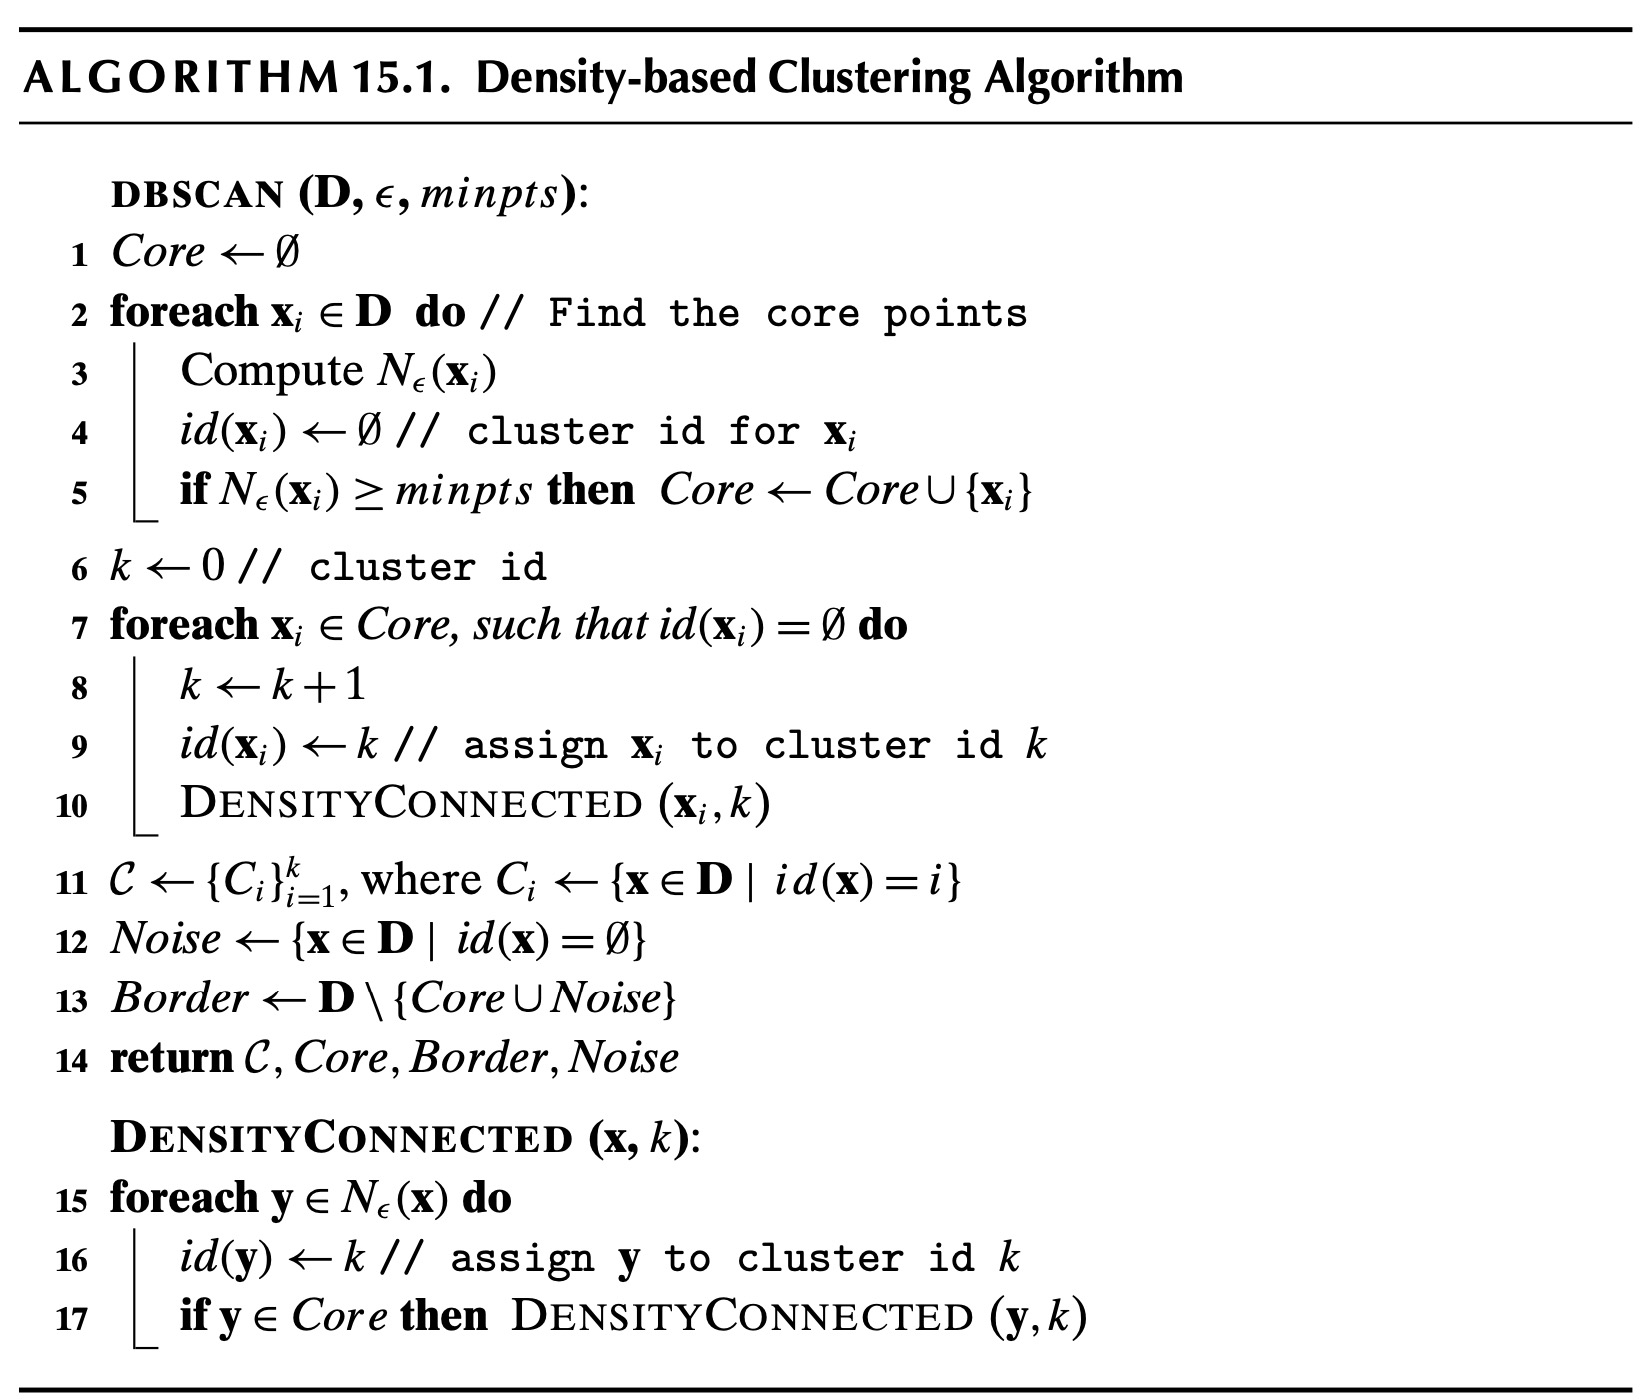

In [ ]:
# Helper function

def get_points_kinds(data, eps, min_points):
    neighbors = NearestNeighbors(radius=eps)
    neighbors.fit(data)
    in_radius = np.asarray(neighbors.radius_neighbors(data))
    core_points = set()
    border_points = set()
    noise_points = set()
    for i in range(len(in_radius[1])):
        if (len(in_radius[1][i]) >= min_points):
            core_points.add(i)
        elif (len(in_radius[1][i]) < min_points and len(in_radius[1][i]) > 0):
            border_points.add(i)
        elif (len(in_radius[1][i]) == 0):
            noise_points.add(i)
    return core_points, border_points, noise_points, in_radius

# DBSCAN Function and 
def dbscan(data, eps, min_points):
    core, border, noise, in_radius = get_points_kinds(data, eps, min_points)
    k = 1
    current_stack = set()
    unvisited = [i for i in range(len(data))]
    clusters = []
    random.seed(42)
    while (len(unvisited) != 0):
        first_point = True
        current_stack.add(random.choice(unvisited))
        while len(current_stack) != 0:
            index = current_stack.pop()
            neigh_indexes, is_core, is_border, is_noise = in_radius[1][index], (
                index in core), (index in border), (index in noise)
            neigh_indexes = set(neigh_indexes) & set(unvisited)
            if (is_border & first_point):
                clusters.append((index, 0))
                clusters.extend(
                    list(__builtins__.zip(neigh_indexes, [0 for _ in range(len(neigh_indexes))])))
                unvisited.remove(index)
                unvisited = [p for p in unvisited if p not in neigh_indexes]
                continue
            unvisited.remove(index)
            neigh_indexes = set(neigh_indexes) & set(unvisited)
            if is_core:
                first_point = False
                clusters.append((index, k))
                current_stack.update(neigh_indexes)
            elif is_border:
                clusters.append((index, k))
            elif is_noise:
                clusters.append((index, 0))
        if not first_point:
            k += 1
    clusters = sorted(list(set(clusters)))
    return clusters

In [ ]:
def dbscan_results(X_train, eps, min):
  clusters = dbscan(np.asarray(X_train), eps, min)
  cluster_count = {}
  for c in clusters:
    if c[1] not in cluster_count:
      cluster_count[c[1]] = 1
    else:
      cluster_count[c[1]] += 1
  print(f"\n#################### Minimum Points = {min} Eps = {eps} ####################\n")
  printWithTitle("Cluster Count:", len(cluster_count)-1)
  for c in cluster_count:
    if c == 0:
      print(f"Noise = {cluster_count[c]}")
    else:
      print(f"Cluster {c} = {cluster_count[c]}")
  y_predict = np.array([])
  for point in clusters:
      y_predict = np.append(y_predict, point[1])
  printWithTitle("y_predict", y_predict)
  printTitle('DBSCAN Evaluation')
  Precision = precision(y_true, y_predict)
  Recall = recall(y_true, y_predict)
  F1_score = f1_score(y_true, y_predict)
  Contitional_Entropy = conditional_entropy(y_true, y_predict)
  printWithTitle('purity', Precision)
  printWithTitle('recall', Recall)
  printWithTitle('f1_score', F1_score)
  printWithTitle('Conditional Entropy', Contitional_Entropy)
  printWithTitle('Correct labels', f'{len(y_predict[y_predict == y_true])} of {len(y_true)}')
  print("##############################################################\n")

In [ ]:
min_points_list = [21,42,84,168,336,672,1344]
eps_list = [1, 42, 64, 128, 256,512, 1024]
for min in min_points_list:
  for eps in eps_list:
    dbscan_results(X_train, eps, min)


#################### Minimum Points = 21 Eps = 1 ####################

Cluster Count::
2

Cluster 2 = 3404
Noise = 3440
Cluster 1 = 503
y_predict:
[2. 0. 2. ... 0. 0. 0.]

DBSCAN Evaluation:
purity:
0.7506465223900912

recall:
0.707056668293142

f1_score:
0.6756789501134511

Conditional Entropy:
0.6306917233525658

Correct labels:
4863 of 7347

##############################################################


#################### Minimum Points = 21 Eps = 42 ####################

Cluster Count::
10

Cluster 3 = 3421
Cluster 2 = 1623
Noise = 1250
Cluster 6 = 72
Cluster 1 = 784
Cluster 10 = 21
Cluster 8 = 29
Cluster 7 = 69
Cluster 5 = 30
Cluster 4 = 21
Cluster 9 = 27
y_predict:
[3. 2. 3. ... 2. 2. 0.]

DBSCAN Evaluation:
purity:
0.9922417313189057

recall:
0.8821252940956182

f1_score:
1.2104844277865954

Conditional Entropy:
0.06683969050012778

Correct labels:
1218 of 7347

##############################################################



<ipython-input-19-9d6784afb8b5>:17: RuntimeWarning: divide by zero encountered in long_scalars
  recall[i] = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]
<ipython-input-19-9d6784afb8b5>:30: RuntimeWarning: divide by zero encountered in long_scalars
  r = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]



#################### Minimum Points = 21 Eps = 64 ####################

Cluster Count::
12

Cluster 3 = 3421
Cluster 2 = 1623
Cluster 6 = 52
Cluster 8 = 74
Noise = 1148
Cluster 1 = 784
Cluster 11 = 27
Cluster 9 = 33
Cluster 12 = 29
Cluster 7 = 72
Cluster 5 = 35
Cluster 4 = 22
Cluster 10 = 27
y_predict:
[3. 2. 3. ... 2. 2. 0.]

DBSCAN Evaluation:
purity:
0.992377841295767

recall:
0.8956202269700311

f1_score:
1.0046738055679147

Conditional Entropy:
0.056974933746659795

Correct labels:
1130 of 7347

##############################################################



<ipython-input-19-9d6784afb8b5>:17: RuntimeWarning: divide by zero encountered in long_scalars
  recall[i] = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]
<ipython-input-19-9d6784afb8b5>:30: RuntimeWarning: divide by zero encountered in long_scalars
  r = np.max(np.bincount(y_true[idx])) / y_true[y_true == i].shape[0]



#################### Minimum Points = 21 Eps = 128 ####################

Cluster Count::
6

Cluster 3 = 3423
Cluster 2 = 2271
Noise = 733
Cluster 1 = 784
Cluster 4 = 78
Cluster 5 = 36
Cluster 6 = 22
y_predict:
[3. 2. 3. ... 2. 2. 0.]

DBSCAN Evaluation:
purity:
0.9078535456648973

recall:
0.7660408614963583

f1_score:
1.2194058587904169

Conditional Entropy:
0.3152523993699746

Correct labels:
720 of 7347

##############################################################


#################### Minimum Points = 21 Eps = 256 ####################

Cluster Count::
4

Cluster 3 = 3425
Cluster 2 = 2745
Cluster 1 = 785
Noise = 355
Cluster 4 = 37
y_predict:
[3. 2. 3. ... 2. 2. 0.]

DBSCAN Evaluation:
purity:
0.8437457465632231

recall:
0.6211892143197131

f1_score:
0.978772681813418

Conditional Entropy:
0.3920909821904787

Correct labels:
346 of 7347

##############################################################


#################### Minimum Points = 21 Eps = 512 ####################

Cluster